In [39]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [40]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'images/train'
valid_path = 'images/test'

In [41]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [42]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [43]:
  # useful for getting number of output classes
folders = glob('images/train/*')

In [44]:
folders

['images/train\\angry',
 'images/train\\happy',
 'images/train\\neutral',
 'images/train\\sad',
 'images/train\\surprise']

In [45]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [46]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [47]:

# view the structure of the model
model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [48]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [49]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [50]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 500 images belonging to 5 classes.


In [51]:
test_set = test_datagen.flow_from_directory('images/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 150 images belonging to 5 classes.


In [52]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),callbacks=[mc]
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - ETA: 0s - loss: 7.3303 - accuracy: 0.1640WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A03276B318> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

16/16 [==============================] - 25s 2s/step - loss: 0.1281 - accuracy: 0.9980 - val_loss: 0.5594 - val_accuracy: 0.8000
Epoch 46/100
16/16 [==============================] - 24s 2s/step - loss: 0.1349 - accuracy: 0.9920 - val_loss: 0.5761 - val_accuracy: 0.7933
Epoch 47/100
16/16 [==============================] - 25s 2s/step - loss: 0.1266 - accuracy: 0.9980 - val_loss: 0.4040 - val_accuracy: 0.8133
Epoch 48/100
16/16 [==============================] - 25s 2s/step - loss: 0.1511 - accuracy: 0.9800 - val_loss: 0.4033 - val_accuracy: 0.9200
Epoch 49/100
16/16 [==============================] - 25s 2s/step - loss: 0.1198 - accuracy: 0.9980 - val_loss: 0.5032 - val_accuracy: 0.8000
Epoch 50/100
16/16 [==============================] - 25s 2s/step - loss: 0.1233 - accuracy: 0.9960 - val_loss: 0.6591 - val_accuracy: 0.8000
Epoch 51/100
16/16 [==============================] - 25s 2s/step - loss: 0.1199 - accuracy: 0.9940 - val_loss: 0.5387 - val_accuracy: 0.8000
Epoch 52/100
16/16 

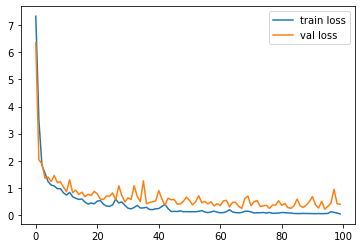

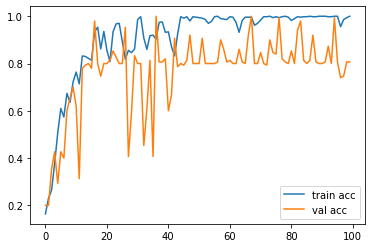

<Figure size 432x288 with 0 Axes>

In [53]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50_emotions.h5')